/var/folders/gr/h20xxnyx09q9l_n7z6lkjwqh0000gn/T/ipykernel_46261/3596848836.py:114: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  return cl(globe=globe, **kw_proj)
/var/folders/gr/h20xxnyx09q9l_n7z6lkjwqh0000gn/T/ipykernel_46261/3596848836.py:141: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
/var/folders/gr/h20xxnyx09q9l_n7z6lkjwqh0000gn/T/ipykernel_46261/3596848836.py:142: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


3.66469828
#7FB9DA
3.68110248
#7FB9DA
3.23818908
#AFD1E7
3.72047256
#66ABD4
3.70406836
#66ABD4
3.43175864
#9BC7E0
3.54986888
#7FB9DA
3.72703424
#66ABD4
2.8871392
#D1E2F2
3.63845156
#7FB9DA
3.5925198
#7FB9DA
3.48097124
#9BC7E0
3.48425208
#9BC7E0
3.44816284
#9BC7E0
3.73359592
#66ABD4
3.71391088
#66ABD4
3.61548568
#7FB9DA
3.4120736
#9BC7E0
3.61220484
#7FB9DA
2.8871392
#D1E2F2
2.8871392
#D1E2F2
3.23818908
#AFD1E7
3.11023632
#AFD1E7
3.23818908
#AFD1E7


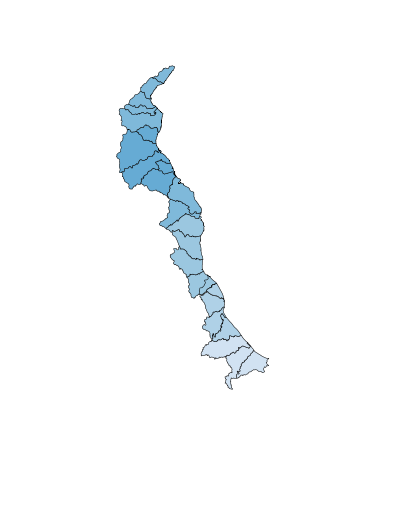

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from metpy.plots import USCOUNTIES
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import pyproj
from pyproj import Proj
from matplotlib.colors import Normalize
from cartopy.feature import ShapelyFeature
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
def check_crs(crs):
    """Checks if the crs represents a valid grid, projection or ESPG string.
    Examples
    --------
    >>> p = check_crs('+units=m +init=epsg:26915')
    >>> p.srs
    '+units=m +init=epsg:26915 '
    >>> p = check_crs('wrong')
    >>> p is None
    True
    Returns
    -------
    A valid crs if possible, otherwise None
    """
    if isinstance(crs, pyproj.Proj) or isinstance(crs, Grid):
        out = crs
    elif isinstance(crs, dict) or isinstance(crs, string_types):
        try:
            out = pyproj.Proj(crs)
        except RuntimeError:
            try:
                out = pyproj.Proj(init=crs)
            except RuntimeError:
                out = None
    else:
        out = None
    return out
def proj_to_cartopy(proj):
    """Converts a pyproj.Proj to a cartopy.crs.Projection
    Parameters
    ----------
    proj: pyproj.Proj
        the projection to convert
    Returns
    -------
    a cartopy.crs.Projection object
    """

    import cartopy.crs as ccrs

    proj = check_crs(proj)


    srs = proj.srs

    km_proj = {'lon_0': 'central_longitude',
               'lat_0': 'central_latitude',
               'x_0': 'false_easting',
               'y_0': 'false_northing',
               'k': 'scale_factor',
               'zone': 'zone',
               }
    km_globe = {'a': 'semimajor_axis',
                'b': 'semiminor_axis',
                }
    km_std = {'lat_1': 'lat_1',
              'lat_2': 'lat_2',
              }
    kw_proj = dict()
    kw_globe = dict()
    kw_std = dict()
    for s in srs.split('+'):
        s = s.split('=')
        if len(s) != 2:
            continue
        k = s[0].strip()
        v = s[1].strip()
        try:
            v = float(v)
        except:
            pass
        if k == 'proj':
            if v == 'tmerc':
                cl = ccrs.TransverseMercator
            if v == 'lcc':
                cl = ccrs.LambertConformal
            if v == 'merc':
                cl = ccrs.Mercator
            if v == 'utm':
                cl = ccrs.UTM
        if k in km_proj:
            kw_proj[km_proj[k]] = v
        if k in km_globe:
            kw_globe[km_globe[k]] = v
        if k in km_std:
            kw_std[km_std[k]] = v

    globe = None
    if kw_globe:
        globe = ccrs.Globe(**kw_globe)
    if kw_std:
        kw_proj['standard_parallels'] = (kw_std['lat_1'], kw_std['lat_2'])

    # mercatoooor
    if cl.__name__ == 'Mercator':
        kw_proj.pop('false_easting', None)
        kw_proj.pop('false_northing', None)

    return cl(globe=globe, **kw_proj)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

min_lon = -76.2 #lons['data'].min() + 2.5
min_lat = 38.3 #lats['data'].min() + 2
max_lat = 39.9 #lats['data'].max() - 2
max_lon = -74.6

data = pd.read_csv("/Users/james/Documents/water_levels.csv")
data.index = data.station

# shapefile
shp2 = shpreader.Reader('/Users/james/Documents/inland_bays/cfms_inland_bays.shp')
shp = shpreader.Reader('/Users/james/Documents/Github/UD_SRS/cema/coastal_flood/shapefiles/cfms_watersheds.shp')
c = Proj('+proj=tmerc +lat_0=38 +lon_0=-75.41666666666667 +k=0.999995 +x_0=200000 +y_0=0 +datum=NAD83 +units=m +no_defs ')
oldproj = proj_to_cartopy(c)
subplot_kw = dict(projection=ccrs.Mercator())

cmap_cfms = ['#F7FBFF', '#E9F2FA', '#DDEAF6', '#D1E2F2', '#C3DAEE', '#AFD1E7', '#9BC7E0','#7FB9DA', '#66ABD4', '#509CCC', '#3D8DC3', '#2B7CBB', '#1D6BB0','#0C5AA2', '#07468B', '#08306B']
colrng = [2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.5,5,5.5,6,6.01]

fig, ax = plt.subplots(figsize=(7, 11),subplot_kw=subplot_kw)
ax.set_extent((min_lon, max_lon, min_lat, max_lat))
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
for record, state in zip(shp.records(), shp.geometries()):
    tem = data.maxpred[str(record.attributes['station']) + '       ']
    print(tem)
    col_ = cmap_cfms[find_nearest(colrng, tem)]
    print(col_)
    ax.add_geometries([state], oldproj,
                      facecolor=col_, edgecolor='black', linewidth=0.5)
    


#DDEAF6
#E9F2FA
#DDEAF6
#E9F2FA
#F7FBFF
#F7FBFF


/var/folders/gr/h20xxnyx09q9l_n7z6lkjwqh0000gn/T/ipykernel_37392/1935536735.py:3: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)


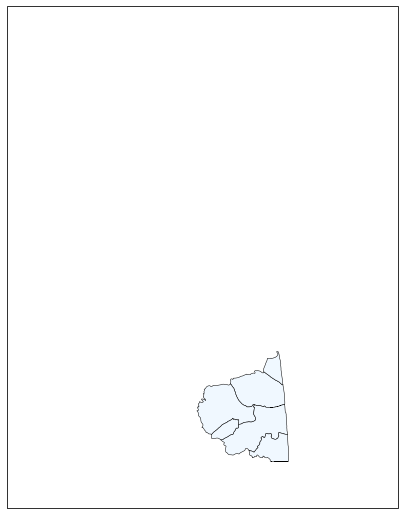

In [75]:
fig, ax = plt.subplots(figsize=(7, 11),subplot_kw=subplot_kw)
ax.set_extent((min_lon, max_lon, min_lat, max_lat))
ax.background_patch.set_visible(False)

for record, state in zip(shp2.records(), shp2.geometries()):
    tem = data.maxpred[str(record.attributes['station']) + '       ']
    col_ = cmap_cfms[find_nearest(colrng, tem)]
    print(col_)
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor='aliceblue', edgecolor='black', linewidth=0.5)

In [45]:
for record, state in zip(shp2.records(), shp2.geometries()):
    print(record.attributes)

{'OBJECTID': 26, 'BASINS_ID': 28, 'MAJORBASIN': 'Inland Bays/Atlantic Ocean', 'OLDNUMBER': 308, 'DRBC': 'NO', 'WATERSHED': 'Rehoboth Bay', 'RIVERSHED': 'Delaware Inland Bays', 'BASINCODE': 'I', 'ACREAGE': 46018.80078125, 'SHAPEAREA': 306047364.376693, 'SHAPELEN': 72538.1898152108}
{'OBJECTID': 27, 'BASINS_ID': 29, 'MAJORBASIN': 'Inland Bays/Atlantic Ocean', 'OLDNUMBER': 308, 'DRBC': 'NO', 'WATERSHED': 'Indian River', 'RIVERSHED': 'Delaware Inland Bays', 'BASINCODE': 'I', 'ACREAGE': 55091.69921875, 'SHAPEAREA': 365810352.927978, 'SHAPELEN': 97094.8999777119}
{'OBJECTID': 28, 'BASINS_ID': 31, 'MAJORBASIN': 'Inland Bays/Atlantic Ocean', 'OLDNUMBER': 308, 'DRBC': 'NO', 'WATERSHED': 'Indian River Bay', 'RIVERSHED': 'Delaware Inland Bays', 'BASINCODE': 'I', 'ACREAGE': 55208.8984375, 'SHAPEAREA': 365886171.589999, 'SHAPELEN': 105497.890163172}
{'OBJECTID': 30, 'BASINS_ID': 33, 'MAJORBASIN': 'Inland Bays/Atlantic Ocean', 'OLDNUMBER': 308, 'DRBC': 'NO', 'WATERSHED': 'Iron Branch', 'RIVERSHED': 

In [49]:
for record, state in zip(shp.records(), shp.geometries()):
    print(record.attributes)

{'huc_8': '02040205', 'huc_10': '0204020507', 'huc_12': '020402050704', 'acres': 6488.0, 'hu_10_ds': '0204020401', 'hu_10_name': 'C&D Canal - Red Lion Creek', 'hu_10_mod': 'NM', 'hu_10_type': 'F', 'hu_12_ds': '020402040106', 'hu_12_name': 'Dragon Creek-Delaware River', 'hu_12_mod': 'OT,TF', 'hu_12_type': 'F', 'hu_8_name': 'Brandywine-Christina', 'station': 'DBOFS015', 'community': None}
{'huc_8': '02040205', 'huc_10': '0204020507', 'huc_12': '020402050703', 'acres': 8025.0, 'hu_10_ds': '0204020401', 'hu_10_name': 'C&D Canal - Red Lion Creek', 'hu_10_mod': 'NM', 'hu_10_type': 'F', 'hu_12_ds': '020402040105', 'hu_12_name': 'Red Lion Creek-Delaware River', 'hu_12_mod': 'TF', 'hu_12_type': 'F', 'hu_8_name': 'Brandywine-Christina', 'station': 'DBOFS016', 'community': None}
{'huc_8': '02040207', 'huc_10': '0204020705', 'huc_12': '020402070506', 'acres': 10541.0, 'hu_10_ds': '0204020400', 'hu_10_name': 'Mispillion River-Delaware Bay', 'hu_10_mod': 'NM', 'hu_10_type': 'F', 'hu_12_ds': '2040204

In [46]:
import geopandas as gp

In [52]:
cfms = gp.read_file('/Users/james/Downloads/cfms_inland_bays_watersheds.zip')

In [53]:
cfms

,OBJECTID,BASINS_ID,MAJORBASIN,OLDNUMBER,DRBC,WATERSHED,RIVERSHED,BASINCODE,ACREAGE,SHAPEAREA,SHAPELEN,geometry
0,26,28,Inland Bays/Atlantic Ocean,308,NO,Rehoboth Bay,Delaware Inland Bays,I,46018.800781,3.060474e+08,72538.189815,"POLYGON ((-75.28817 38.70102, -75.28830 38.701..."
1,27,29,Inland Bays/Atlantic Ocean,308,NO,Indian River,Delaware Inland Bays,I,55091.699219,3.658104e+08,97094.899978,"POLYGON ((-75.28817 38.70102, -75.28805 38.700..."
2,28,31,Inland Bays/Atlantic Ocean,308,NO,Indian River Bay,Delaware Inland Bays,I,55208.898438,3.658862e+08,105497.890163,"POLYGON ((-75.18842 38.63330, -75.18737 38.632..."
3,30,33,Inland Bays/Atlantic Ocean,308,NO,Iron Branch,Delaware Inland Bays,I,9874.519531,6.544131e+07,36279.340505,"POLYGON ((-75.36616 38.53783, -75.36497 38.538..."
4,32,35,Inland Bays/Atlantic Ocean,310,NO,Little Assawoman,Maryland Inland Bays,I,23773.800781,1.572989e+08,65602.716479,"POLYGON ((-75.05370 38.53842, -75.05367 38.538..."
5,46,26,Inland Bays/Atlantic Ocean,308,NO,Lewes-Rehoboth Canal,Delaware Inland Bays,I,10727.900391,7.148318e+07,40412.872047,"POLYGON ((-75.13568 38.78266, -75.13507 38.782..."


In [ ]:
Lewes-Rehoboth Canal:  DBOFS039
Rehoboth Bay:  DBOFS044
Indian River:  DBOFS065
Iron Branch:  DBOFS065 (fow now....we might adjust this one after John's models are integrated, but this is fine for now).
Indian River Bay:  DBOFS045
Little Assawoman:  DBOFS038

In [65]:
stations_list = ['DBOFS044', 'DBOFS065', 'DBOFS045', 'DBOFS065', 'DBOFS038', 'DBOFS039']

In [57]:
stations_list

0    6
dtype: int64

In [66]:
cfms['station'] = stations_list

In [67]:
cfms

,OBJECTID,BASINS_ID,MAJORBASIN,OLDNUMBER,DRBC,WATERSHED,RIVERSHED,BASINCODE,ACREAGE,SHAPEAREA,SHAPELEN,geometry,station
0,26,28,Inland Bays/Atlantic Ocean,308,NO,Rehoboth Bay,Delaware Inland Bays,I,46018.800781,3.060474e+08,72538.189815,"POLYGON ((-75.28817 38.70102, -75.28830 38.701...",DBOFS044
1,27,29,Inland Bays/Atlantic Ocean,308,NO,Indian River,Delaware Inland Bays,I,55091.699219,3.658104e+08,97094.899978,"POLYGON ((-75.28817 38.70102, -75.28805 38.700...",DBOFS065
2,28,31,Inland Bays/Atlantic Ocean,308,NO,Indian River Bay,Delaware Inland Bays,I,55208.898438,3.658862e+08,105497.890163,"POLYGON ((-75.18842 38.63330, -75.18737 38.632...",DBOFS045
3,30,33,Inland Bays/Atlantic Ocean,308,NO,Iron Branch,Delaware Inland Bays,I,9874.519531,6.544131e+07,36279.340505,"POLYGON ((-75.36616 38.53783, -75.36497 38.538...",DBOFS065
4,32,35,Inland Bays/Atlantic Ocean,310,NO,Little Assawoman,Maryland Inland Bays,I,23773.800781,1.572989e+08,65602.716479,"POLYGON ((-75.05370 38.53842, -75.05367 38.538...",DBOFS038
5,46,26,Inland Bays/Atlantic Ocean,308,NO,Lewes-Rehoboth Canal,Delaware Inland Bays,I,10727.900391,7.148318e+07,40412.872047,"POLYGON ((-75.13568 38.78266, -75.13507 38.782...",DBOFS039


In [68]:
cfms.to_file("/Users/james/Documents/cfms_inland_bays.shp")